In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import psycopg2
import nltk
import gensim
from gensim import corpora, models
import string
from nltk.stem import WordNetLemmatizer 
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database, drop_database
import matplotlib.pyplot as plt

In [2]:
with open('pg_credentials.p', 'rb') as f:
    pg_credentials = pickle.load(f)

In [3]:
host     = 'localhost'
db_name  = 'goodreads_db'
username = pg_credentials['username']
password = pg_credentials['password']
port = '5432'  # default port that postgres listens on
    
con = psycopg2.connect(database = db_name, user = username, host=host, password=password)

In [34]:
query = "SELECT * FROM works_flask"
all_data = pd.read_sql_query(query, con)

In [36]:
from utils import make_regression_array
data, mask = make_regression_array(all_data)

Languages: ['English']


In [37]:
ymask = (all_data['pubyear'][mask] < 2019) & (all_data['pubyear'][mask] > 2008)
mask[mask][~ymask.values] = False
data = data[ymask]

In [38]:
len(data)

595

In [29]:
all_false = all_data.loc[false_negative.index]

In [30]:
all_false[['author', 'title']]

,author,title
41,Helene Wecker,The Golem and the Jinni
221,Catherynne M. Valente,Palimpsest
278,Catherynne M. Valente,Space Opera
360,Terry Pratchett,Unseen Academicals
455,Amie Kaufman,Gemina
556,Paolo Bacigalupi,Ship Breaker
586,Jim Butcher,The Aeronaut's Windlass
587,Paolo Bacigalupi,The Windup Girl
676,Patrick Rothfuss,The Wise Man's Fear
693,Cherie Priest,Boneshaker


[[96, 17], [9, 473]]


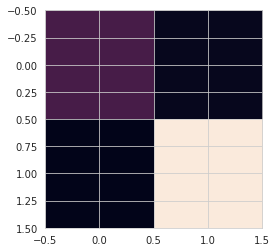

In [55]:
sns.set_style('whitegrid')
array = [[np.sum(data[data['true_score']>0]['pred_score'] >= 0.5), np.sum(data[data['true_score']>0]['pred_score'] < 0.5)],
         [np.sum(data[data['true_score']==0]['pred_score'] >= 0.5), np.sum(data[data['true_score']==0]['pred_score'] < 0.5)]]
df_cm = pd.DataFrame(array, index = ["Nom", 'Not nom'],
                  columns = ["Nom", "Not nom"])
plt.imshow(df_cm)
print(array)

(array([492.,  17.,  16.,   7.,  12.,   7.,  11.,   9.,   5.,  19.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

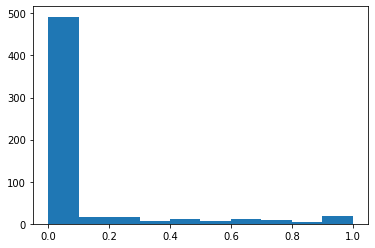

In [39]:
plt.hist(data['true_score'])

In [46]:
nn = (data['true_score']==0) & (data['pred_score']<0.5)

In [48]:
data[data['true_score']==0]['pred_score']

6       0.191714
12      0.322980
13      0.203588
18      0.285826
22      0.222043
          ...   
1838    0.226232
1840    0.289574
1841    0.276029
1845    0.221587
1849    0.216704
Name: pred_score, Length: 482, dtype: float64

In [50]:
np.sum(data[data['true_score']==0]['pred_score'] < 0.5)

473